## Gaussian Filter

In [44]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [45]:
img =  cv2.imread('Fabric1.jpg')

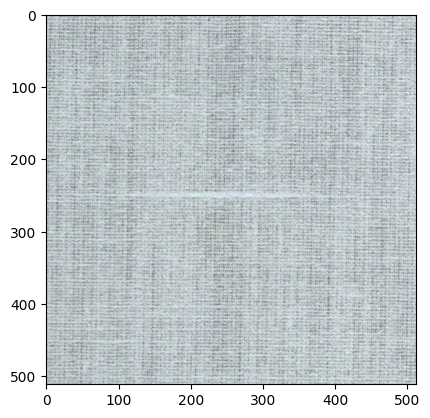

In [46]:
plt.imshow(img)

In [47]:
img_s = img[:,:,0]
mask_x = np.zeros((2,1))
mask_x[0] = -1
mask_x[1] = 1

In [48]:
mask_x

array([[-1.],
       [ 1.]])

In [49]:
Ix = cv2.filter2D(img_s,-1,mask_x)

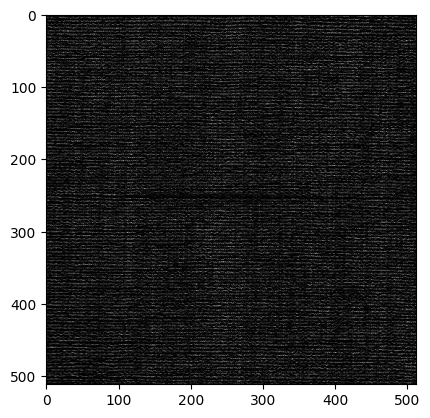

In [50]:
plt.imshow(Ix,cmap='gray')

In [51]:
mask_y = mask_x.T

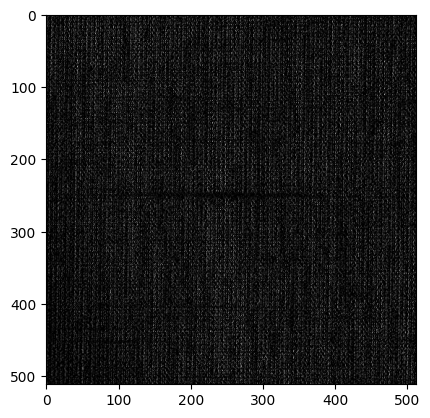

In [52]:
Iy = cv2.filter2D(img_s,-1,mask_y)
plt.imshow(Iy,cmap='gray')

In [53]:
kernenl_size = (5, 5)
use_otsu = True
manual_threshold_value = 194

for x in range(24):
    img = cv2.imread(f"img_data/Fabric{x+1}.jpg")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, kernenl_size, 0)
    if use_otsu:
        ret, thresh = cv2.threshold(
            blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
        )
    else:
        ret, thresh = cv2.threshold(
            blurred, manual_threshold_value, 255, cv2.THRESH_BINARY_INV
        )
    plt.imsave(f"img_blurred/Fabric{x+1}_blurred.jpg", blurred,cmap='gray')

In [55]:
img_new = cv2.imread(f"img_data_2/type1.png")
img_new_gray = cv2.cvtColor(img_new,cv2.COLOR_BGR2GRAY)

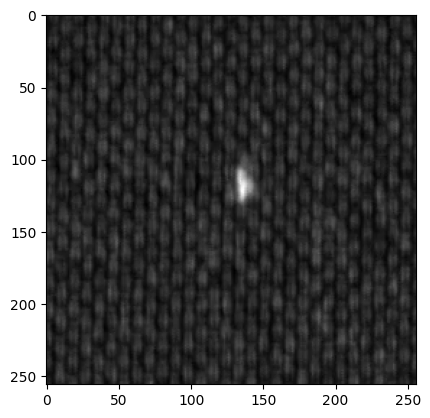

In [56]:
plt.imshow(img_new_gray,cmap="gray")

In [67]:
img_brit = cv2.imread(f"img_data_2/type9.png")


In [68]:
img_brit_gray = cv2.cvtColor(img_brit,cv2.COLOR_BGR2GRAY)
brit = 40


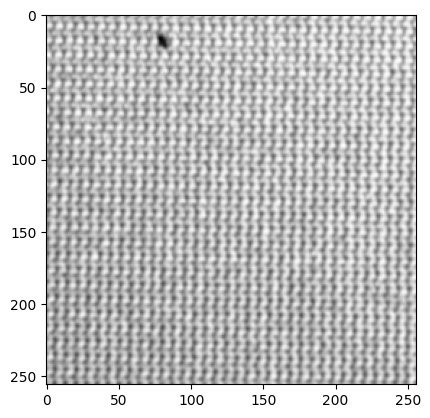

In [69]:
adjusted_img = img_brit_gray.astype(np.float32) + brit

plt.imshow(adjusted_img,cmap="gray")


In [ ]:
kernenl_size = (5, 5)
use_otsu = True
manual_threshold_value = 194
brit = 40

for x in range(10):
    if x==8:
        img = cv2.imread(f"img_data_2/type{x+1}.png")
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, kernenl_size, 0)
       

    else:
        img = cv2.imread(f"img_data_2/type{x+1}.png")
        adjusted_img = img+ brit
        gray = cv2.cvtColor(adjusted_img, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, kernenl_size, 0)
        if use_otsu:
            ret, thresh = cv2.threshold(
                blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
            )
        else:
            ret, thresh = cv2.threshold(
                blurred, manual_threshold_value, 255, cv2.THRESH_BINARY_INV
            )
    

In [1]:
!pip3 install ultralytics


[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
   -------------------- ------------------- 0.5/1.0 MB 1.3 MB/s eta 0:00:01
   ------------------------------- -------- 0.8/1.0 MB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 1.2 MB/s eta 0:00:00


In [1]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLOv8n model
model = YOLO("yolov8n.pt")



In [3]:
results = model.train(data="D:\\7th_sem_Learnings\Research_Papers\Defect Recognition Model\data.yaml", 
                      epochs=50, 
                      imgsz=640,
                      device=0,
                      #augmentation Parameters
                      degrees=0.5,
                      translate=0.1,
                      scale=0.5,
                      fliplr = 0.5,
                      hsv_h=0.015,
                      hsv_s=0.7,
                      hsv_v=0.4)

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\vihan\AppData\Local\Temp\ipykernel_12320\657465568.py:1: SyntaxWarning: invalid escape sequence '\R'
  results = model.train(data="D:\\7th_sem_Learnings\Research_Papers\Defect Recognition Model\data.yaml",


New https://pypi.org/project/ultralytics/8.3.163 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.119  Python-3.12.2 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:\7th_sem_Learnings\Research_Papers\Defect Recognition Model\data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fal

train: Scanning D:\7th_sem_Learnings\Research_Papers\Defect Recognition Model\train\labels.cache... 810 images, 0 backgrounds, 0 corrupt: 100%|██████████| 810/810 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access  (ping: 0.30.2 ms, read: 21.15.1 MB/s, size: 23.9 KB)


val: Scanning D:\7th_sem_Learnings\Research_Papers\Defect Recognition Model\valid\labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.46G      1.874      4.237       1.71         20        640: 100%|██████████| 51/51 [00:38<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.05s/it]

                   all         80        103    0.00579      0.557      0.104     0.0484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.45G      1.809      3.591      1.647         16        640: 100%|██████████| 51/51 [00:34<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]

                   all         80        103      0.101     0.0799     0.0629     0.0319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.48G      1.898      3.378      1.719         24        640: 100%|██████████| 51/51 [00:34<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]

                   all         80        103      0.308      0.101     0.0391     0.0158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.47G      1.862      3.122      1.724         24        640: 100%|██████████| 51/51 [00:34<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.17s/it]

                   all         80        103      0.149       0.31      0.104     0.0383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.45G       1.82      2.948      1.721         15        640: 100%|██████████| 51/51 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.86s/it]

                   all         80        103      0.252       0.16       0.15     0.0793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.44G      1.792      2.804      1.746         25        640: 100%|██████████| 51/51 [00:34<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.27s/it]

                   all         80        103      0.249      0.223      0.221       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.44G      1.776       2.58      1.717         20        640: 100%|██████████| 51/51 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.17s/it]

                   all         80        103      0.236      0.404      0.263      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.44G      1.757      2.487      1.641         22        640: 100%|██████████| 51/51 [00:34<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.24s/it]

                   all         80        103      0.276      0.366      0.293      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.45G      1.702      2.359       1.65         19        640: 100%|██████████| 51/51 [00:34<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.13s/it]

                   all         80        103      0.296      0.361      0.293      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.48G      1.666      2.317      1.623         21        640: 100%|██████████| 51/51 [00:34<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.51s/it]

                   all         80        103      0.481      0.255       0.24      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.48G      1.611      2.178      1.584         20        640: 100%|██████████| 51/51 [00:34<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]

                   all         80        103      0.283      0.373      0.269      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.44G      1.601      2.108      1.582         31        640: 100%|██████████| 51/51 [00:34<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.07s/it]

                   all         80        103      0.406      0.466      0.433      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.45G      1.598      2.066      1.554         19        640: 100%|██████████| 51/51 [00:34<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.15s/it]

                   all         80        103      0.591      0.389      0.444      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.47G      1.576      2.069      1.553         25        640: 100%|██████████| 51/51 [00:34<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.13s/it]

                   all         80        103      0.489      0.539      0.514       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.47G      1.545      1.942      1.521         25        640: 100%|██████████| 51/51 [00:34<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

                   all         80        103      0.611      0.472      0.537      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.44G      1.546      1.897      1.515         26        640: 100%|██████████| 51/51 [00:34<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.15s/it]

                   all         80        103      0.389      0.401      0.406      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.45G      1.499      1.881      1.463         16        640: 100%|██████████| 51/51 [00:34<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.13s/it]

                   all         80        103      0.448      0.426       0.42      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.47G      1.522      1.864      1.499         23        640: 100%|██████████| 51/51 [00:34<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.09s/it]

                   all         80        103      0.631      0.505      0.585      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.44G      1.473       1.79      1.467         26        640: 100%|██████████| 51/51 [00:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]

                   all         80        103      0.607      0.517      0.608      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.44G       1.44      1.731      1.435         23        640: 100%|██████████| 51/51 [00:34<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.86s/it]

                   all         80        103      0.675      0.416      0.469      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.45G       1.43      1.709      1.438         18        640: 100%|██████████| 51/51 [00:39<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.71s/it]

                   all         80        103      0.587      0.482      0.575      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.47G      1.426      1.705      1.439         22        640: 100%|██████████| 51/51 [00:35<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.63s/it]

                   all         80        103      0.497      0.568      0.555      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.47G      1.369      1.631      1.396         18        640: 100%|██████████| 51/51 [00:34<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.33s/it]

                   all         80        103      0.497      0.569       0.51      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.44G      1.408      1.621      1.395         16        640: 100%|██████████| 51/51 [00:34<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.30s/it]

                   all         80        103      0.637      0.738       0.71       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.45G      1.387       1.62      1.407         20        640: 100%|██████████| 51/51 [00:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.86s/it]

                   all         80        103      0.627      0.589      0.673      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.44G      1.359      1.504      1.385         18        640: 100%|██████████| 51/51 [00:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]

                   all         80        103       0.61      0.665      0.666      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.44G      1.347      1.507      1.383         25        640: 100%|██████████| 51/51 [00:34<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]

                   all         80        103       0.69      0.674      0.707       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.44G      1.336      1.496      1.375         15        640: 100%|██████████| 51/51 [00:34<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.13s/it]

                   all         80        103      0.803      0.642      0.766      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.45G      1.331      1.465      1.361         22        640: 100%|██████████| 51/51 [00:34<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.15s/it]

                   all         80        103      0.681      0.668      0.758      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.47G      1.337      1.467      1.352         23        640: 100%|██████████| 51/51 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.76s/it]

                   all         80        103      0.739      0.659       0.74      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.45G      1.275      1.385      1.326         17        640: 100%|██████████| 51/51 [00:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]

                   all         80        103      0.728      0.703      0.734      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.47G      1.299      1.432      1.338         23        640: 100%|██████████| 51/51 [00:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.71s/it]

                   all         80        103      0.682      0.704      0.737      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.45G      1.293      1.444      1.346         17        640: 100%|██████████| 51/51 [00:34<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.62s/it]

                   all         80        103       0.71      0.606      0.699      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.48G      1.246      1.329      1.311         14        640: 100%|██████████| 51/51 [00:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.63s/it]

                   all         80        103      0.699      0.641      0.702      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.47G      1.243      1.345      1.327         20        640: 100%|██████████| 51/51 [00:35<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]

                   all         80        103      0.726      0.649      0.721      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.47G      1.254      1.332      1.323         20        640: 100%|██████████| 51/51 [00:34<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]

                   all         80        103      0.679      0.621      0.685      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.45G      1.205       1.24      1.286         18        640: 100%|██████████| 51/51 [00:34<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]

                   all         80        103      0.705      0.742       0.78      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.48G      1.243      1.292      1.312         18        640: 100%|██████████| 51/51 [00:34<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.17s/it]

                   all         80        103       0.78      0.703      0.766      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.45G      1.205      1.262      1.297         15        640: 100%|██████████| 51/51 [00:34<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.20s/it]

                   all         80        103      0.716      0.741      0.779      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.44G      1.211      1.267      1.286         11        640: 100%|██████████| 51/51 [00:34<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.14s/it]

                   all         80        103      0.764       0.69      0.771      0.479


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.45G      1.163      1.086      1.273          9        640: 100%|██████████| 51/51 [00:34<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]

                   all         80        103      0.801      0.678      0.754       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.44G      1.132      1.011      1.261         10        640: 100%|██████████| 51/51 [00:33<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.56s/it]

                   all         80        103      0.786      0.759        0.8      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.44G      1.118      1.002      1.243         12        640: 100%|██████████| 51/51 [00:34<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]

                   all         80        103      0.731      0.716      0.746       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.44G      1.125     0.9818      1.261         13        640: 100%|██████████| 51/51 [00:34<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.17s/it]

                   all         80        103      0.785      0.762      0.799      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.45G      1.076     0.9244      1.222         10        640: 100%|██████████| 51/51 [00:34<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]

                   all         80        103      0.745      0.765      0.799      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.44G      1.081      0.944      1.239         11        640: 100%|██████████| 51/51 [00:34<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]

                   all         80        103      0.832       0.75      0.814      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.44G      1.074     0.8924      1.221         10        640: 100%|██████████| 51/51 [00:34<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.27s/it]

                   all         80        103        0.8      0.761      0.806      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.44G      1.029     0.8584      1.191         11        640: 100%|██████████| 51/51 [00:34<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]

                   all         80        103      0.839      0.744      0.813      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.45G      1.033      0.866      1.204         10        640: 100%|██████████| 51/51 [00:34<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.10s/it]

                   all         80        103      0.832      0.778      0.821      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.44G      1.033     0.8932      1.203          9        640: 100%|██████████| 51/51 [00:34<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.07s/it]

                   all         80        103      0.849      0.753      0.822      0.529



50 epochs completed in 0.574 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 6.3MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics 8.3.119  Python-3.12.2 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]


                   all         80        103      0.819      0.768      0.816      0.524
                  Hole         23         25      0.918       0.76      0.856      0.556
                object         19         25      0.716       0.72      0.753      0.494
              Oil Spot         19         24      0.866      0.833      0.899      0.656
          Thread Error         19         29      0.775      0.759      0.756      0.391
Speed: 0.7ms preprocess, 9.6ms inference, 0.0ms loss, 6.5ms postprocess per image
Results saved to runs\detect\train2
